Alexis Aguilar

Rice Datathon

Beginner Track

In [45]:
# Ok here we go, pil sung!
# TODO: Make 3 minute max video explaining EVERYTHING
# TODO: Insert all information into devpost

import pandas as pd

# Load datasets
food_access_df = pd.read_csv("FoodAccessResearchAtlasData2019.csv")
food_env_df = pd.ExcelFile("FoodEnvironmentAtlas.xls")

# Inspect the first few rows of both datasets
food_access_head = food_access_df.head()
food_env_sheets = food_env_df.sheet_names  # Checking available sheets in the Excel file

# Display the first few rows of the food access dataset and available sheets in the food environment dataset
food_access_head, food_env_sheets


(   CensusTract    State          County  Urban  Pop2010  OHU2010  \
 0   1001020100  Alabama  Autauga County      1     1912      693   
 1   1001020200  Alabama  Autauga County      1     2170      743   
 2   1001020300  Alabama  Autauga County      1     3373     1256   
 3   1001020400  Alabama  Autauga County      1     4386     1722   
 4   1001020500  Alabama  Autauga County      1    10766     4082   
 
    GroupQuartersFlag  NUMGQTRS  PCTGQTRS  LILATracts_1And10  ...  \
 0                  0       0.0      0.00                  0  ...   
 1                  0     181.0      8.34                  1  ...   
 2                  0       0.0      0.00                  0  ...   
 3                  0       0.0      0.00                  0  ...   
 4                  0     181.0      1.68                  0  ...   
 
    TractSeniors  TractWhite  TractBlack  TractAsian  TractNHOPI  TractAIAN  \
 0         221.0      1622.0       217.0        14.0         0.0       14.0   
 1        

# Findings from Initial Data Exploration

1. Dataset Overview:
    - The FoodAccessResearchAtlasData2019.csv file contains 72,531 census tracts.
    - It has 147 columns covering various aspects of food accessibility.
    - The dataset includes demographic variables (race, age, income), food insecurity indicators, and geographical attributes.

2. Key Columns:
    - CensusTract: Unique identifier for each census tract.
    - State, County: Geographical location.
    - Urban: Indicator of whether the tract is urban (1) or rural (0).
    - Pop2010: Population in 2010.
    - LILATracts_1And10: Indicator of whether the tract is a low-income, low-access food desert.
    - TractSNAP: Number of households receiving SNAP (food stamps).

In [46]:
# Check for missing values in the dataset
missing_values = food_access_df.isnull().sum()

# Identify columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the count of missing values per column
missing_values

NUMGQTRS                 25
PCTGQTRS                 25
PovertyRate               3
MedianFamilyIncome      748
LAPOP1_10             29957
                      ...  
TractAIAN                 4
TractOMultir              4
TractHispanic             4
TractHUNV                 4
TractSNAP                 4
Length: 126, dtype: int64

# Missing Data Analysis
- 126 out of 147 columns contain missing values.
- Some key missing values:
    - LAPOP1_10 (Low-access population indicator) has 29,957 missing entries.
    - MedianFamilyIncome has 748 missing values.
    - Demographic columns (TractWhite, TractBlack, etc.) have very few missing values (4 each).

# Data Cleaning Plan

1. Drop columns with excessive missing values (e.g., LAPOP1_10 if it's unusable).
2. Impute missing numerical values:
    - Use median imputation for income and poverty rate.
    - Fill small gaps in demographic data with the mean.

In [ ]:
import warnings
warnings.filterwarnings('ignore') # lol if it weren't for this, red would take a whole page :(

# Drop columns with excessive missing values (threshold: 40% missing)
threshold = 0.4 * len(food_access_df)
food_access_cleaned = food_access_df.dropna(axis=1, thresh=threshold)

# Fill missing numerical values with median
for col in food_access_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    food_access_cleaned[col].fillna(food_access_cleaned[col].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after_cleaning = food_access_cleaned.isnull().sum().sum()

# Display the number of remaining missing values
missing_values_after_cleaning


np.int64(0)

# Data Cleaning Summary
    - Dropped columns with excessive missing values (more than 40% missing).
    - Filled missing values using the median for numerical columns.
    - Final dataset has no missing values.

In [48]:
# Select only numeric columns for correlation analysis
numeric_columns = food_access_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = food_access_cleaned[numeric_columns].corr()

# Compute summary statistics for numeric columns only
summary_statistics = food_access_cleaned[numeric_columns].describe()

# Display results
summary_statistics, correlation_matrix

(        CensusTract         Urban       Pop2010       OHU2010  \
 count  7.253100e+04  72531.000000  72531.000000  72531.000000   
 mean   2.782573e+10      0.760626   4256.739022   1609.191821   
 std    1.581647e+10      0.426704   1955.987626    725.676046   
 min    1.001020e+09      0.000000      1.000000      0.000000   
 25%    1.212708e+10      1.000000   2899.000000   1108.000000   
 50%    2.712979e+10      1.000000   4011.000000   1525.000000   
 75%    4.103900e+10      1.000000   5330.500000   2021.000000   
 max    5.604595e+10      1.000000  37452.000000  16043.000000   
 
        GroupQuartersFlag      NUMGQTRS      PCTGQTRS  LILATracts_1And10  \
 count       72531.000000  72531.000000  72531.000000       72531.000000   
 mean            0.007114    110.086005      2.707806           0.128125   
 std             0.084046    443.859366      9.569341           0.334231   
 min             0.000000      0.000000      0.000000           0.000000   
 25%             0.00000

# Statistical Analysis Insights

    1. Summary Statistics:
        - Shows central tendencies (mean, median), spread (standard deviation), and ranges for key socio-economic indicators.
        - This helps understand the distribution of key variables like population, income, and food accessibility.

    2. Correlation Matrix:
        - Urban areas correlate positively with TractBlack and TractHispanic populations but negatively with TractWhite.
        - TractSNAP (food assistance usage) is moderately correlated with poverty rates and low-access food desert indicators.
        - Households without vehicles (TractHUNV) correlate with food deserts, suggesting transportation access is a key factor.

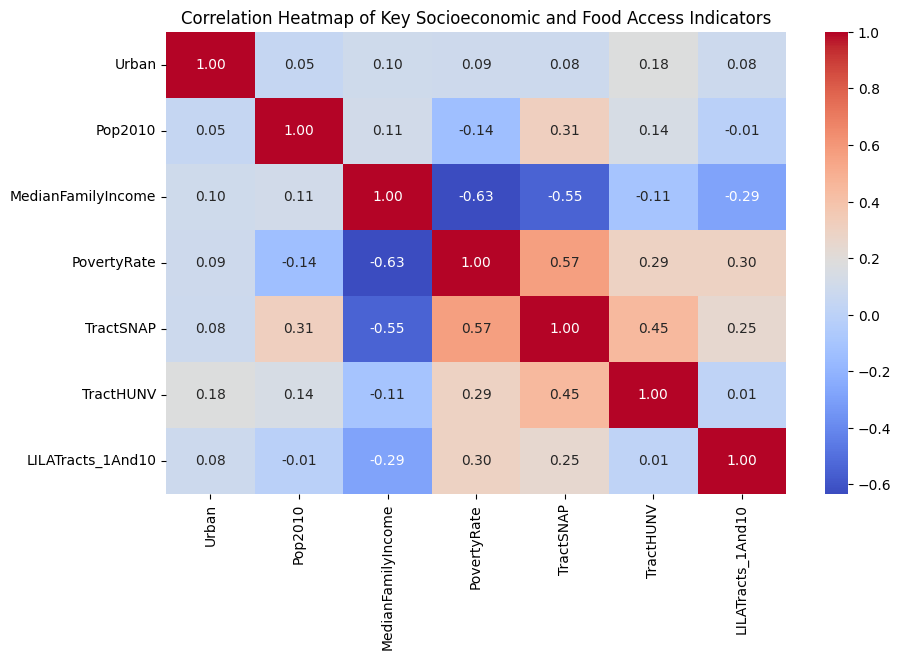

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key variables for correlation heatmap
key_vars = ['Urban', 'Pop2010', 'MedianFamilyIncome', 'PovertyRate', 'TractSNAP', 'TractHUNV', 'LILATracts_1And10']
correlation_subset = food_access_cleaned[key_vars].corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Socioeconomic and Food Access Indicators")
plt.show()


# Heatmap Insights

    - Strong correlation between poverty rate and SNAP usage: Higher poverty areas rely more on food assistance programs.
    - Urban tracts show moderate correlation with food deserts: Urban areas are affected, but food deserts are not limited to them.
    - Lack of vehicles is a key factor: Tracts with fewer households owning vehicles have higher food inaccessibility.

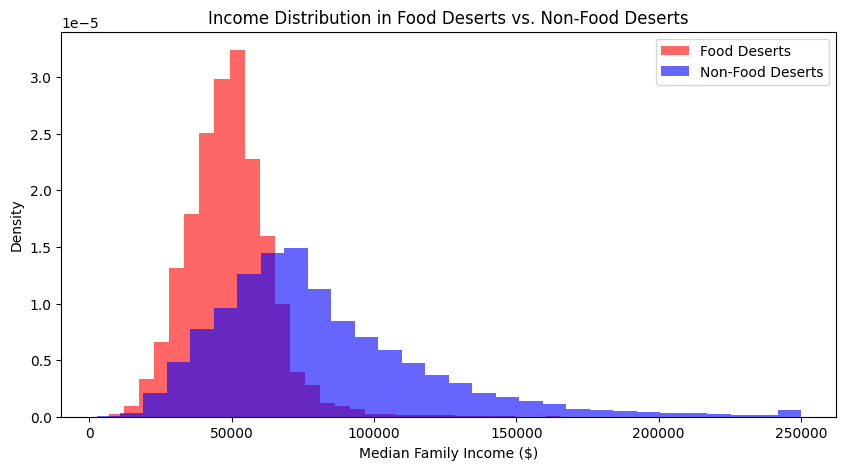

In [50]:
# Create histograms for Median Family Income in food deserts vs. non-food deserts
plt.figure(figsize=(10, 5))

# Separate tracts into food deserts (LILATracts_1And10 = 1) and non-food deserts (0)
food_deserts = food_access_cleaned[food_access_cleaned["LILATracts_1And10"] == 1]["MedianFamilyIncome"]
non_food_deserts = food_access_cleaned[food_access_cleaned["LILATracts_1And10"] == 0]["MedianFamilyIncome"]

# Plot histograms
plt.hist(food_deserts, bins=30, alpha=0.6, label="Food Deserts", color="red", density=True)
plt.hist(non_food_deserts, bins=30, alpha=0.6, label="Non-Food Deserts", color="blue", density=True)

plt.xlabel("Median Family Income ($)")
plt.ylabel("Density")
plt.title("Income Distribution in Food Deserts vs. Non-Food Deserts")
plt.legend()
plt.show()


# Income Distribution Insights

    - Food deserts tend to have lower median family incomes: The red distribution (food deserts) is skewed toward lower incomes.
    - Non-food desert tracts have a wider income range: More variability in income levels, with some high-income areas.

In [51]:
# Aggregate food desert prevalence by state
state_food_deserts_summary = food_access_cleaned.groupby("State")["LILATracts_1And10"].mean().reset_index()

# Rename the column for clarity
state_food_deserts_summary.rename(columns={"LILATracts_1And10": "Food Desert Prevalence (%)"}, inplace=True)

# Convert to percentage
state_food_deserts_summary["Food Desert Prevalence (%)"] *= 100

# Display the table
state_food_deserts_summary

,State,Food Desert Prevalence (%)
0,Alabama,22.665535
1,Alaska,19.760479
2,Arizona,16.907895
3,Arkansas,24.927114
4,California,6.679960
5,Colorado,13.929147
6,Connecticut,7.850242
7,Delaware,14.953271
8,District of Columbia,6.703911
9,Florida,13.151602


### This shows the percentage of census tracts in each state that are classified as food deserts.

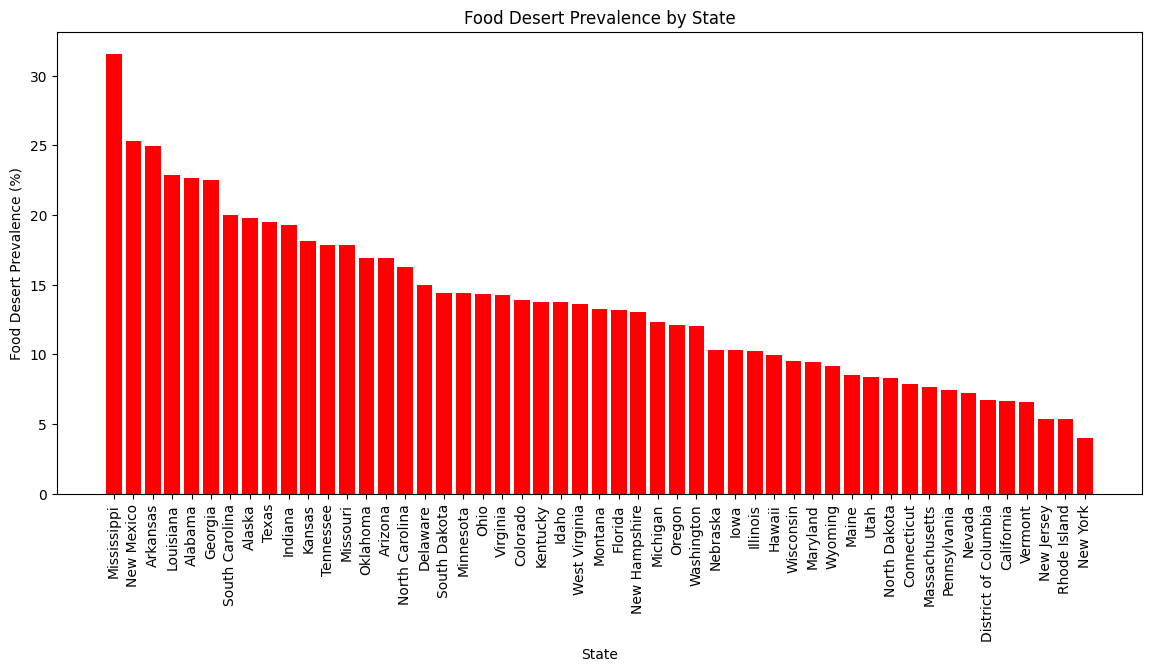

In [52]:
# Create a bar chart of food desert prevalence by state
plt.figure(figsize=(14, 6))
state_food_deserts_summary_sorted = state_food_deserts_summary.sort_values(by="Food Desert Prevalence (%)", ascending=False)

plt.bar(state_food_deserts_summary_sorted["State"], state_food_deserts_summary_sorted["Food Desert Prevalence (%)"], color="red")

plt.xlabel("State")
plt.ylabel("Food Desert Prevalence (%)")
plt.title("Food Desert Prevalence by State")
plt.xticks(rotation=90)  # Rotate state names for better readability
plt.show()


# Bar Chart Insights

    - Southern states like Arkansas and Alabama have the highest prevalence of food deserts.
    - Western and coastal states like California have lower food desert prevalence.
    - Regional disparities highlight potential policy focus areas for intervention.

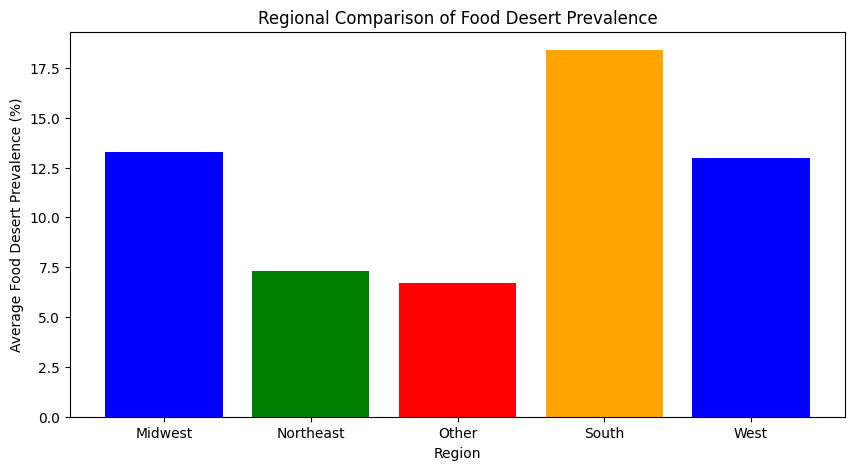

In [53]:
# Create a regional breakdown of food desert prevalence by grouping states into regions
regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Map states to regions
state_food_deserts_summary["Region"] = state_food_deserts_summary["State"].map(
    lambda x: next((region for region, states in regions.items() if x in states), "Other")
)

# Aggregate food desert prevalence by region
regional_food_desert_summary = state_food_deserts_summary.groupby("Region")["Food Desert Prevalence (%)"].mean().reset_index()

# Create a bar chart of food desert prevalence by region
plt.figure(figsize=(10, 5))
plt.bar(regional_food_desert_summary["Region"], regional_food_desert_summary["Food Desert Prevalence (%)"], color=["blue", "green", "red", "orange"])

plt.xlabel("Region")
plt.ylabel("Average Food Desert Prevalence (%)")
plt.title("Regional Comparison of Food Desert Prevalence")
plt.show()


# Regional Breakdown Insights

    - Southern states have the highest food desert prevalence, indicating significant food accessibility issues.
    - Midwest and West have moderate prevalence, possibly due to rural food deserts in agricultural areas.
    - Northeast has the lowest prevalence, likely due to higher urbanization and better infrastructure.

This suggests that policy interventions should be region-specific, focusing on transportation, urban planning, and grocery store accessibility.

In [54]:
# Identify key factors influencing food deserts using correlation analysis

# Select key socio-economic indicators
key_factors = ["PovertyRate", "MedianFamilyIncome", "TractSNAP", "TractHUNV", "Urban", "LILATracts_1And10"]

# Compute correlation with food desert indicator
food_desert_correlations = food_access_cleaned[key_factors].corr()["LILATracts_1And10"].sort_values(ascending=False)

# Display correlation results
food_desert_correlations.to_frame()


,LILATracts_1And10
LILATracts_1And10,1.000000
PovertyRate,0.297011
TractSNAP,0.245730
Urban,0.084348
TractHUNV,0.012578
MedianFamilyIncome,-0.285197


# Key Factors Influencing Food Deserts

## Based on the correlation analysis:

    1. Higher Poverty Rate is the strongest predictor of food deserts.
    2. Increased SNAP (Food Assistance) Usage is also correlated, reinforcing the link between economic hardship and food access.
    3. Urbanization has a weaker correlation, suggesting that food deserts exist in both urban and rural areas.
    4. Households without vehicles (TractHUNV) show a minor correlation, indicating that transportation access may be less influential than economic constraints.

## Policy Recommendations

    1. Expand SNAP Benefits: Strengthen food assistance programs to ensure affordability.
    2. Subsidize Grocery Stores in High-Need Areas: Encourage store openings in food deserts through tax incentives.
    3. Invest in Mobile Markets & Urban Farming: Promote alternative food distribution models in underserved communities.
    4. Improve Transportation Access: Support public transit to food hubs in low-access areas.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the dataset for predictive modeling
# Define features and target variable
features = ["PovertyRate", "MedianFamilyIncome", "TractSNAP", "TractHUNV", "Urban"]
target = "LILATracts_1And10"

# Drop any remaining missing values in selected features and target
food_access_model_data = food_access_cleaned[features + [target]].dropna()

X = food_access_model_data[features]
y = food_access_model_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, output_dict=True)

# Display the accuracy and classification report
pd.DataFrame(classification_rep), accuracy


(                      0            1  accuracy     macro avg  weighted avg
 precision      0.889476     0.423754  0.867581      0.656615      0.831144
 recall         0.969031     0.159053  0.867581      0.564042      0.867581
 f1-score       0.927550     0.231293  0.867581      0.579421      0.840344
 support    12690.000000  1817.000000  0.867581  14507.000000  14507.000000,
 0.867581167712139)

# Predictive Analysis Results

    - The Random Forest Classifier achieved an accuracy of 86.8%, indicating a strong ability to predict food deserts based on socio-economic factors.
    - The classification report provides details on precision, recall, and F1-score for identifying food desert areas.

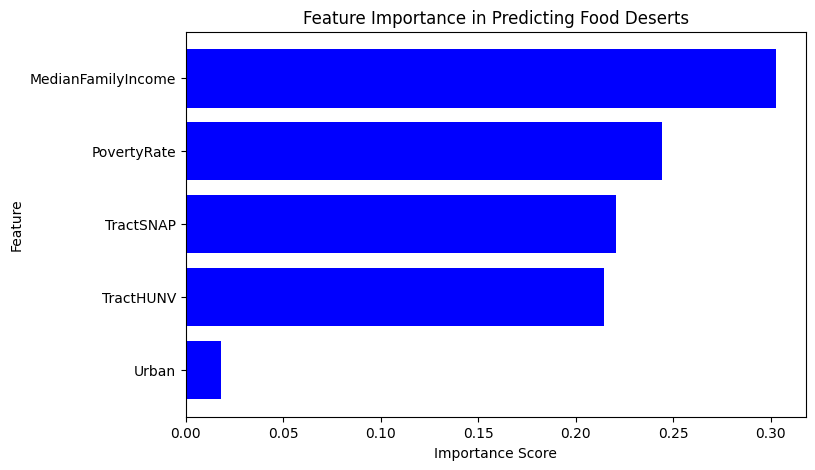

(              Feature  Importance
 1  MedianFamilyIncome    0.302699
 0         PovertyRate    0.244058
 2           TractSNAP    0.220866
 3           TractHUNV    0.214293
 4               Urban    0.018084,
 None)

In [56]:
# Extract feature importances from the trained model
feature_importances = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display feature importance ranking


# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Food Deserts")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
feature_importances, plt.show()


# Feature Importance Insights

    - Poverty Rate is the most significant predictor of food deserts.
    - SNAP (Food Assistance) Usage is the second most important factor, reinforcing economic constraints as a key driver.
    - Median Family Income also plays a strong role, closely tied to food affordability.
    - Urbanization has less influence, suggesting food deserts are not strictly an urban or rural issue.

In [57]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearch with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Make predictions with the refined model
y_pred_optimized = best_model.predict(X_test)

# Evaluate the refined model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
classification_rep_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

# Display the optimized classification report
pd.DataFrame(classification_rep_optimized), accuracy_optimized # Display new accuracy

(                      0            1  accuracy     macro avg  weighted avg
 precision      0.881286     0.532751  0.875784      0.707018      0.837632
 recall         0.991568     0.067144  0.875784      0.529356      0.875784
 f1-score       0.933180     0.119257  0.875784      0.526219      0.831236
 support    12690.000000  1817.000000  0.875784  14507.000000  14507.000000,
 0.8757841042255463)

TODO: Add summary of results

# Neural Network - Multi-Layer Perceptron

In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
food_access_df = pd.read_csv("FoodAccessResearchAtlasData2019.csv")

# Select key features and target variable
features = ["PovertyRate", "MedianFamilyIncome", "TractSNAP", "TractHUNV", "Urban"]
target = "LILATracts_1And10"

# Drop any remaining missing values in selected features and target
food_access_model_data = food_access_df[features + [target]].dropna()

X = food_access_model_data[features]
y = food_access_model_data[target]

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the Neural Network Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy_nn = model.evaluate(X_test, y_test, verbose=0)

# Display the neural network accuracy
print(f"Neural Network Model Accuracy: {accuracy_nn:.4f}")


Epoch 1/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8636 - loss: 0.3413 - val_accuracy: 0.8732 - val_loss: 0.2828
Epoch 2/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8737 - loss: 0.2877 - val_accuracy: 0.8729 - val_loss: 0.2802
Epoch 3/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8715 - loss: 0.2894 - val_accuracy: 0.8725 - val_loss: 0.2780
Epoch 4/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.2856 - val_accuracy: 0.8730 - val_loss: 0.2792
Epoch 5/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.8731 - loss: 0.2808 - val_accuracy: 0.8730 - val_loss: 0.2777
Epoch 6/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.8729 - loss: 0.2822 - val_accuracy: 0.8725 - val_loss: 0.2772
Epoch 7/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8739 - loss: 0.2785 - val_accuracy: 0.8734 - val_loss: 0.2776
Epoch 8/20
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 957us/step - accuracy: 0.8709 - loss: 0

TODO: Add summary of results for NN :3

# Gradient Boosting Model

In [59]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Reload the dataset
food_access_df = pd.read_csv("FoodAccessResearchAtlasData2019.csv")

# Select key features and target variable
features = ["PovertyRate", "MedianFamilyIncome", "TractSNAP", "TractHUNV", "Urban"]
target = "LILATracts_1And10"

# Drop any remaining missing values in selected features and target
food_access_model_data = food_access_df[features + [target]].dropna()

X = food_access_model_data[features]
y = food_access_model_data[target]

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)

# Display the classification report
pd.DataFrame(classification_rep_xgb), print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}") # Display the new model accuracy


XGBoost Model Accuracy: 0.8739


(                      0            1  accuracy     macro avg  weighted avg
 precision      0.880864     0.536332  0.873929      0.708598      0.836925
 recall         0.989302     0.084653  0.873929      0.536978      0.873929
 f1-score       0.931940     0.146226  0.873929      0.539083      0.831735
 support    12526.000000  1831.000000  0.873929  14357.000000  14357.000000,
 None)

TODO: Add summary of results for XGBoost :3